In [4]:
#This is the initial code for the project
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [5]:
#Read the csv file of drone 3rd QRT  2023  Part 107 registrants. 
d3 = pd.read_csv('drone3qrt.csv')
print(d3)

                    Country State/Providence/Region          City Postal Code  \
0               Afghanistan                      TN  Murfreesboro       37128   
1                   Albania                     NaN        Tirane        1057   
2            American Samoa          American Samoa      Pagopago       96799   
3            American Samoa                      AS     Pago Pago       96799   
4            American Samoa                      AS      Pagopago       96799   
...                     ...                     ...           ...         ...   
29175  Virgin Islands, U.S.                      vi     St Thomas       00802   
29176  Virgin Islands, U.S.                      VI      St. John       00831   
29177  Virgin Islands, U.S.                      VI    St. Thomas       00802   
29178  Virgin Islands, U.S.                      VI    ST. Thomas       00803   
29179  Virgin Islands, U.S.                      VI    St. Thomas       00805   

       Number of Registrati

In [6]:
#Read the csv file of drone 3rd QRT  2023  Part 107 registrants. 
dc = pd.read_csv('dronecountry.csv')
print(dc)

                     Country  NumberofRegistrations_count
0                Afghanistan                            1
1                    Albania                            1
2             American Samoa                            3
3                    Andorra                            1
4                     Angola                            1
..                       ...                          ...
124                  Uruguay                            3
125               Uzbekistan                            1
126                 Viet Nam                            2
127  Virgin Islands, British                            2
128     Virgin Islands, U.S.                           16

[129 rows x 2 columns]


C:\Users\SHI\AppData\Local\Temp/ipykernel_24824/3557974900.py:6: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


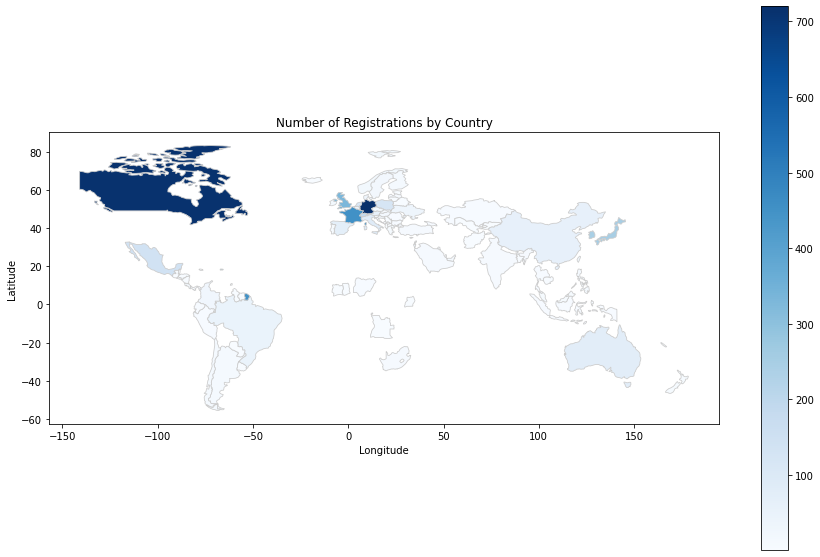

In [7]:
import geopandas as gpd

import matplotlib.pyplot as plt

# Read the shapefile for world map
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

# Merge the world map with the dc dataframe
merged = world.merge(dc, left_on='name', right_on='Country', how='left')

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
merged.plot(column='NumberofRegistrations_count', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the title and axis labels
ax.set_title('Number of Registrations by Country')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

<AxesSubplot:xlabel='Country'>

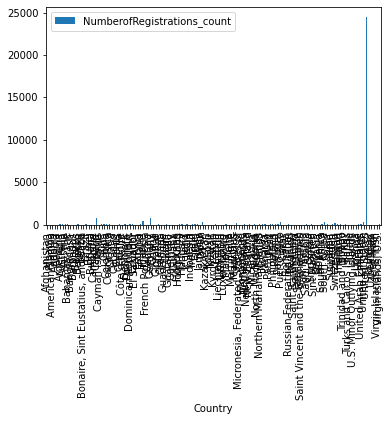

In [8]:
dc.plot(x='Country', y='NumberofRegistrations_count', kind='bar')

In [9]:
droneus = d3[d3['Country'] == 'United States']
print(droneus)

             Country State/Providence/Region                       City  \
4739   United States                     NaN                Gainesville   
4740   United States                     NaN                 Shreveport   
4741   United States                      AE                        APO   
4742   United States                      AE                        APO   
4743   United States                      AE                        APO   
...              ...                     ...                        ...   
29151  United States                      WY                  Wheatland   
29152  United States                      WY                     Wilson   
29153  United States                      WY                    Worland   
29154  United States                      WY                     Wright   
29155  United States                      WY  Yellowstone National Park   

      Postal Code  Number of Registrations  Unnamed: 5  
4739        30501                        1

In [10]:
dronestate = droneus.groupby('State/Providence/Region')['Number of Registrations'].sum()
print(dronestate)
#print(droneus_count_by_state)

State/Providence/Region
AE       20
AK     1694
AL     6555
AP       13
AR     2571
AZ     8201
CA    45844
CO    11214
CT     4091
DC     1749
DE     1588
FL    26888
GA    10270
GU       16
HI     1965
IA     3419
ID     4709
IL     9768
IN     6382
KS     2946
KY     3261
LA     3263
MA     6684
MD     6355
ME     1809
MI     9724
MN     6309
MO     5862
MP        6
MS     2060
MT     2072
NC    11396
ND     1535
NE     2703
NH     1784
NJ     6853
NM     2629
NV     3612
NY    13418
OH    10637
OK     4234
OR     5816
PA    10676
PR      295
RI      953
SC     4742
SD     1017
TN     6463
TX    33510
UT     6023
VA    11481
VI        7
VT      759
WA    10850
WI     5908
WV     1393
WY      905
Name: Number of Registrations, dtype: int64


<AxesSubplot:xlabel='State/Providence/Region'>

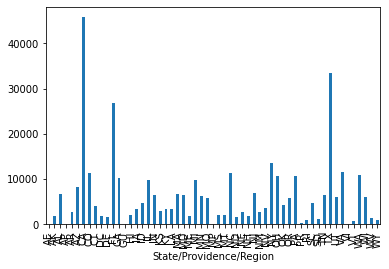

In [11]:
dronestate.plot(x='State/Providence/Region', y='Number of Registrations', kind='bar')

In [12]:
usa_pa_data = d3[(d3['Country'] == 'United States') & (d3['State/Providence/Region'] == 'PA')]
print(usa_pa_data)

             Country State/Providence/Region          City Postal Code  \
22691  United States                      PA   Abbottstown       17301   
22692  United States                      PA      Abington       19001   
22693  United States                      PA          Acme       15610   
22694  United States                      PA      Airville       17302   
22695  United States                      PA         Akron       17501   
...              ...                     ...           ...         ...   
23888  United States                      PA         Yukon       15698   
23889  United States                      PA    Zelienople       16063   
23890  United States                      PA   Zelienople,       16063   
23891  United States                      PA  ZIEGLERVILLE       19492   
23892  United States                      PA    Zionsville       18092   

       Number of Registrations  Unnamed: 5  
22691                        6         NaN  
22692                

In [13]:
pa_county_sum = usa_pa_data.groupby('City')['Number of Registrations'].sum()
print(pa_county_sum)

City
ALLENTOWN       11
ASPERS           3
Abbottstown      6
Abington        21
Acme             1
                ..
philadelphia    29
pittsburgh      26
seneca           2
susquehanna      3
york,            1
Name: Number of Registrations, Length: 1023, dtype: int64


In [24]:
pa_zip_sum = usa_pa_data.groupby('Postal Code')['Number of Registrations'].sum()
print(pa_zip_sum)

Postal Code
15001    34
15003     7
15004     3
15005     1
15009    20
         ..
19608    20
19609    11
19610     9
19611     5
99705     1
Name: Number of Registrations, Length: 1042, dtype: int64


In [18]:
import seaborn as sns

import matplotlib.pyplot as plt

# Reshape the series into a dataframe
pa_county_sum_df = pa_county_sum.reset_index()
pa_county_sum_df.columns = ['City', 'Number of Registrations']

# Create a pivot table for the heatmap
#heatmap_data = pa_county_sum_df.pivot('City', 'Number of Registrations')
heatmap_data = pa_county_sum_df.pivot('City', 'Number of Registrations')
#, 'Number of Registrations')
# Create the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, cmap='Blues', annot=True, fmt='d')
plt.title('Number of Registrations by County')
plt.xlabel('Number of Registrations')
plt.ylabel('County')
plt.show()

TypeError: pivot() takes 1 positional argument but 3 were given

In [21]:
import geopandas as gpd

import matplotlib.pyplot as plt

# Read the shapefile for US map
us_map = gpd.read_file('us_map.shp')

# Merge the US map with the dronestate dataframe
merged_us = us_map.merge(dronestate, left_on='name', right_on='State/Providence/Region', how='left')

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
merged_us.plot(column='Number of Registrations', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the title and axis labels
ax.set_title('Number of Registrations by State')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

DriverError: us_map.shp: No such file or directory

In [25]:
import geopandas as gpd

import matplotlib.pyplot as plt

# Read the shapefile for US map
us_map = gpd.read_file('us_map.shp')

# Merge the US map with the d3_us dataframe
merged_us = us_map.merge(d3_us, left_on='name', right_on='City', how='left')

# Plot the map
fig, ax = plt.subplots(figsize=(15, 10))
merged_us.plot(column='Number of Registrations', cmap='Blues', linewidth=0.8, ax=ax, edgecolor='0.8', legend=True)

# Set the title and axis labels
ax.set_title('Number of Registrations in the US')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

# Show the plot
plt.show()

DriverError: us_map.shp: No such file or directory